In [1]:
import math
import pandas as pd
import datetime, os
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

from scipy.stats import norm
from scipy import optimize
import scipy.integrate as integrate
import scipy.special as special 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import clone
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [3]:
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

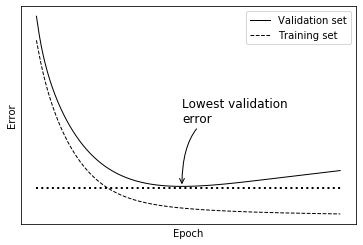

In [4]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Lowest validation \nerror',
             xy=(best_epoch, best_val_rmse), 
             xytext=(best_epoch, best_val_rmse + 1),
             #ha="center"
             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"),
             fontsize=12)

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "k-", linewidth=1, label="Validation set")
plt.plot(np.sqrt(train_errors), "k--", linewidth=1, label="Training set")
plt.legend(loc="upper right", fontsize=10)
plt.xticks([])
plt.yticks([])
plt.xlabel("Epoch", fontsize=10)
plt.ylabel("Error", fontsize=10)
plt.show()

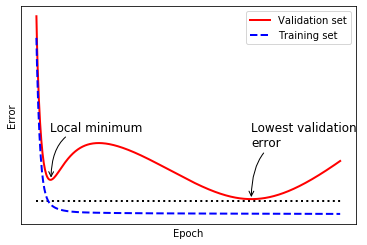

In [6]:
sgd_reg = SGDRegressor(max_iter=10, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Lowest validation \nerror',
             xy=(best_epoch, best_val_rmse), 
             xytext=(best_epoch, best_val_rmse + 0.7),
             #ha="center"
             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"),
             fontsize=12)
plt.annotate('Local minimum',
             xy=(24, 1.15), 
             xytext=(22, 1.3 + 0.5),
             #ha="center"
             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"),
             fontsize=12)

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "r-", linewidth=2, label="Validation set")
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=10)
plt.xticks([])
plt.yticks([])
plt.xlabel("Epoch", fontsize=10)
plt.ylabel("Error", fontsize=10)
plt.savefig('/Users/Marcklein/Desktop/Master Thesis/Option pricing using Neural Networks/Python/Other/Early_stopping.png',
            bbox_inches='tight');
plt.show()